In [1]:
import pandas as pd
import numpy as np

# Load the data
file_path = r'C:\\Users\\91912\\Downloads\\GST - C_AST.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Print the basic information about the dataset
print(f"Number of rows in the dataset: {data.shape[0]}")
print(f"Number of columns in the dataset: {data.shape[1]}")

# Classify the data into two classes based on scores
data['Class'] = np.where(data['Final_Marks'] <= 5, 1, 2)

# Separate the data into two classes
class_1_data = data[data['Class'] == 1].drop(columns=['Final_Marks', 'Class'])
class_2_data = data[data['Class'] == 2].drop(columns=['Final_Marks', 'Class'])

# Calculate the mean for each class
mean_class_1 = class_1_data.mean(axis=0)
mean_class_2 = class_2_data.mean(axis=0)

# Calculate the standard deviation for each class
std_class_1 = class_1_data.std(axis=0)
std_class_2 = class_2_data.std(axis=0)

# Calculate the distance between the mean vectors of the two classes
distance_between_means = np.linalg.norm(mean_class_1 - mean_class_2)

# Output the calculated data
print("\nMean of Class 1:")
print(mean_class_1)
print("\nMean of Class 2:")
print(mean_class_2)
print("\nStandard Deviation of Class 1:")
print(std_class_1)
print("\nStandard Deviation of Class 2:")
print(std_class_2)
print("\nDistance between Class Centroids:")
print(distance_between_means)


Number of rows in the dataset: 1176
Number of columns in the dataset: 769

Mean of Class 1:
ast_embedding_0     -0.422164
ast_embedding_1     -0.643670
ast_embedding_2      1.499065
ast_embedding_3     -0.906202
ast_embedding_4      0.231688
                       ...   
ast_embedding_763   -1.653775
ast_embedding_764   -1.784785
ast_embedding_765    0.498559
ast_embedding_766    1.270227
ast_embedding_767    3.113621
Length: 768, dtype: float64

Mean of Class 2:
ast_embedding_0     -0.525392
ast_embedding_1     -0.674609
ast_embedding_2      1.476571
ast_embedding_3     -0.985781
ast_embedding_4      0.217423
                       ...   
ast_embedding_763   -1.712300
ast_embedding_764   -1.865434
ast_embedding_765    0.366748
ast_embedding_766    1.021013
ast_embedding_767    3.317665
Length: 768, dtype: float64

Standard Deviation of Class 1:
ast_embedding_0      0.779841
ast_embedding_1      0.588422
ast_embedding_2      0.634986
ast_embedding_3      0.733837
ast_embedding_4      0

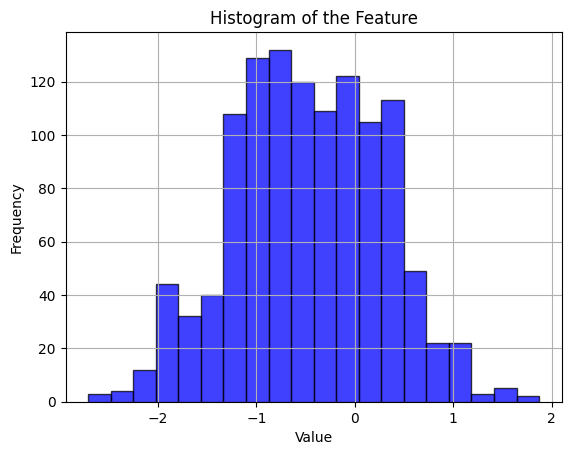

Mean of the selected feature: -0.47
Variance of the selected feature: 0.57


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\\Users\\91912\\Downloads\\GST - C_AST.csv'
data = pd.read_csv(file_path)

# Select a feature; for instance, the first feature column
feature = data.iloc[:, 0]  # Adjust the column index as per the feature of interest

# Calculate the mean and variance of the selected feature
mean = np.mean(feature)
variance = np.var(feature)

# Generate the histogram using matplotlib
plt.hist(feature, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Histogram of the Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

# Display the histogram
plt.show()

# Print the calculated mean and variance
print(f"Mean of the selected feature: {mean:.2f}")
print(f"Variance of the selected feature: {variance:.2f}")


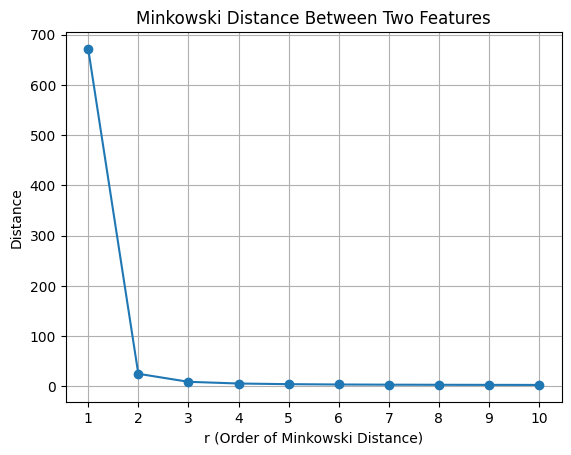

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Load the dataset
file_path = r'C:\\Users\\91912\\Downloads\\GST - C_AST.csv'
data = pd.read_csv(file_path)

# Select two feature vectors; for example, the first and second feature columns
feature1 = data.iloc[:, 0].values  # Adjust the index as needed
feature2 = data.iloc[:, 1].values  # Adjust the index as needed

# Calculate Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = [distance.minkowski(feature1, feature2, r) for r in r_values]

# Plot the distances
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance Between Two Features')
plt.xlabel('r (Order of Minkowski Distance)')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_values)  # Ensure x-axis labels correspond to r values
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = r'C:\\Users\\91912\\Downloads\\GST - C_AST.csv'
data = pd.read_csv(file_path)

# Assume that the last column is 'Final_Marks'
y = data['Final_Marks'].values

# Reclassify 'Final_Marks' into two classes: 1 (for marks 1-5) and 2 (for marks 6-10)
y = np.where(y <= 5, 1, 2)

# Features (excluding 'Final_Marks' from the dataset)
X = data.drop('Final_Marks', axis=1).values

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the size of each set
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (823, 768)
Test set size: (353, 768)


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
file_path = r'C:\\Users\\91912\\Downloads\\GST - C_AST.csv'
data = pd.read_csv(file_path)

# Reclassify 'Final_Marks' into two classes: 1 (for marks 1-5) and 2 (for marks 6-10)
y = np.where(data['Final_Marks'].values <= 5, 1, 2)

# Features (excluding 'Final_Marks' from the dataset)
X = data.drop('Final_Marks', axis=1).values

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# kNN classifier training with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test the kNN model and evaluate accuracy
accuracy = knn.score(X_test, y_test)
print(f"Model accuracy with k=3: {accuracy:.2f}")


Model accuracy with k=3: 0.71


Accuracy for k=1: 0.6827
Accuracy for k=2: 0.6459
Accuracy for k=3: 0.7110
Accuracy for k=4: 0.7082
Accuracy for k=5: 0.7535
Accuracy for k=6: 0.7309
Accuracy for k=7: 0.7479
Accuracy for k=8: 0.7365
Accuracy for k=9: 0.7592
Accuracy for k=10: 0.7365
Accuracy for k=11: 0.7564


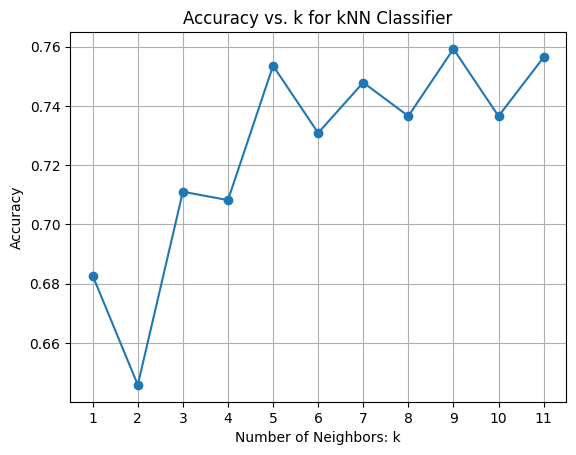

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\\Users\\91912\\Downloads\\GST - C_AST.csv'
data = pd.read_csv(file_path)

# Reclassify 'Final_Marks' into two classes: 1 (for marks 1-5) and 2 (for marks 6-10)
y = np.where(data['Final_Marks'].values <= 5, 1, 2)

# Features (excluding 'Final_Marks' from the dataset)
X = data.drop('Final_Marks', axis=1).values

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize lists to store accuracies
k_values = range(1, 12)  # k from 1 to 11
accuracies = []

# Test kNN for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy:.4f}")

# Plotting the accuracy vs. k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for kNN Classifier')
plt.grid(True)
plt.xticks(k_values)
plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
file_path = r'C:\\Users\\91912\\Downloads\\GST - C_AST.csv'
data = pd.read_csv(file_path)

# Reclassify 'Final_Marks' into two classes: 1 (for marks 1-5) and 2 (for marks 6-10)
y = np.where(data['Final_Marks'].values <= 5, 1, 2)

# Features (excluding 'Final_Marks' from the dataset)
X = data.drop('Final_Marks', axis=1).values

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier with k=3 (you can adjust k as needed)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Evaluate on both training and test sets
datasets = {
    'Training': (X_train, y_train),
    'Test': (X_test, y_test)
}
results = []

for label, (X, y) in datasets.items():
    y_pred = knn.predict(X)
    accuracy = np.mean(y_pred == y)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    results.append({
        'Set': label,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Print results and assess model fit
print("Performance Metrics:")
for result in results:
    print(f"\n{result['Set']} Set:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1-Score: {result['F1-Score']:.4f}")

# Assess model fit based on the comparison of training and test performance
train_accuracy = results[0]['Accuracy']
test_accuracy = results[1]['Accuracy']
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("Model is likely overfitting.")
elif train_accuracy < test_accuracy or abs(train_accuracy - test_accuracy) <= 0.05:
    print("Model has a regular fit.")
else:
    print("Model may be underfitting.")


Performance Metrics:

Training Set:
Accuracy: 0.8493
Precision: 0.8494
Recall: 0.8493
F1-Score: 0.8493

Test Set:
Accuracy: 0.7110
Precision: 0.7140
Recall: 0.7110
F1-Score: 0.7107
Model is likely overfitting.
